**Programmer:** python_scripts (Abhijith Warrier)

**PYTHON SCRIPT TO *VISUALISE MODEL PREDICTIONS VS ACTUAL VALUES OVER TIME USING MATPLOTLIB & PANDAS*. 📈🧠📊**

This script demonstrates how to plot **actual vs predicted values** over time for regression problems.

It helps identify patterns, trends, lag, under/over-prediction zones, and overall model performance in a visually intuitive way — especially useful for forecasting, sales predictions, energy usage, and time-series-like data.

---

## **📦 Import Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

---

## **🧩 Load a Regression Dataset**

We’ll use the **Diabetes dataset**, which produces continuous values — perfect for an “actual vs predicted” line plot.

In [2]:
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

df = pd.DataFrame(X, columns=diabetes.feature_names)
df["target"] = y

---

## **✂️ Train/Test Split**

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

---

## **🤖 Train a Regression Model**

We’ll use a simple Linear Regression model.

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

---

## **📅 Build a Time Index for Visualization**

For demo purposes, we treat each test sample as a time point.

In real use cases, you would use your actual date/time column.

In [5]:
time_index = pd.date_range(
    start="2024-01-01", periods=len(y_test), freq="D"
)

plot_df = pd.DataFrame({
    "date": time_index,
    "actual": y_test,
    "predicted": y_pred
})

---

## **📊 Plot Predictions vs Actuals Over Time**

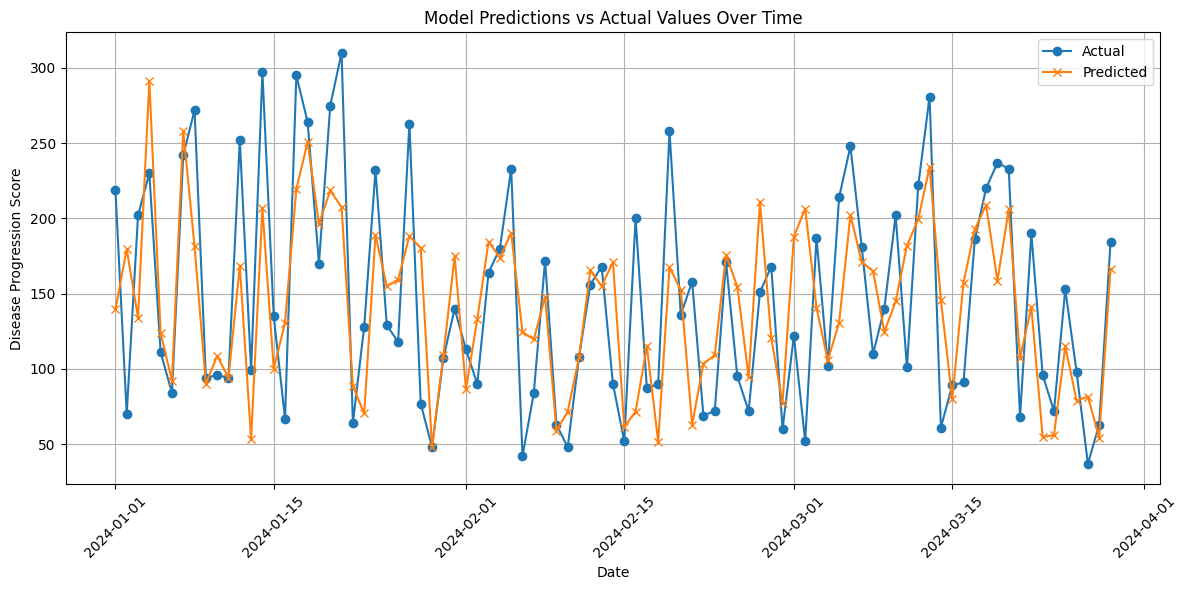

In [6]:
plt.figure(figsize=(12, 6))

plt.plot(plot_df["date"], plot_df["actual"], label="Actual", marker="o")
plt.plot(plot_df["date"], plot_df["predicted"], label="Predicted", marker="x")

plt.title("Model Predictions vs Actual Values Over Time")
plt.xlabel("Date")
plt.ylabel("Disease Progression Score")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

This produces a clean visual comparison line plot showing:

- Model tracking accuracy
- Where predictions deviate
- Trend alignment
- Potential bias or drift

---

## **📈 Optional: Plot Error Over Time**

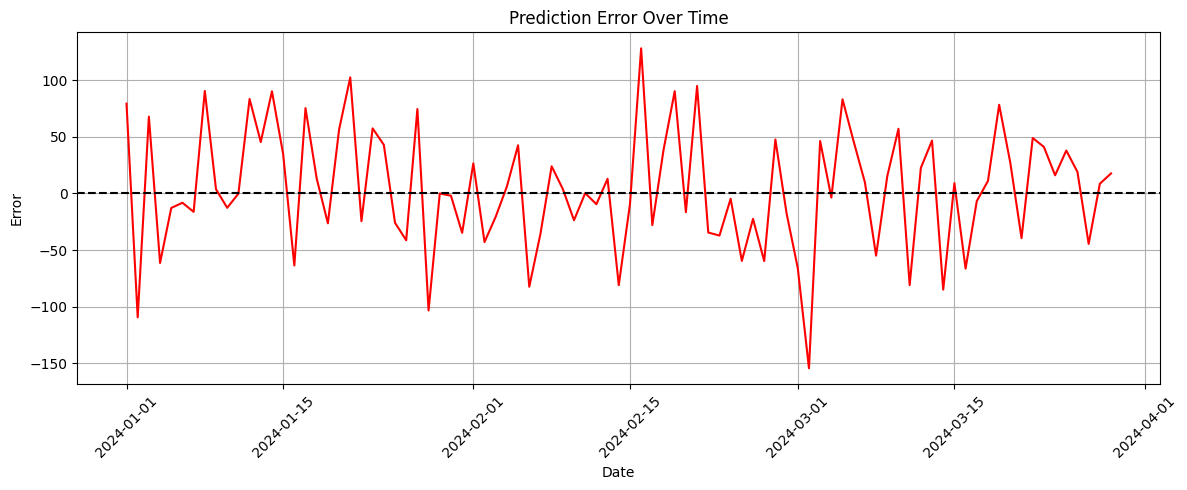

In [7]:
plot_df["error"] = plot_df["actual"] - plot_df["predicted"]

plt.figure(figsize=(12,5))
plt.plot(plot_df["date"], plot_df["error"], color="red")
plt.axhline(0, color="black", linestyle="--")
plt.title("Prediction Error Over Time")
plt.xlabel("Date")
plt.ylabel("Error")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

---